<a href="https://www.kaggle.com/code/rahulbanerj24/cnn-with-image-classification?scriptVersionId=181328161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
import cv2
import pandas as pd
import io

In [3]:
A=cv2.imread('/kaggle/input/image-samples/Example_3.jpg')

In [4]:
A.shape

(28, 28, 3)

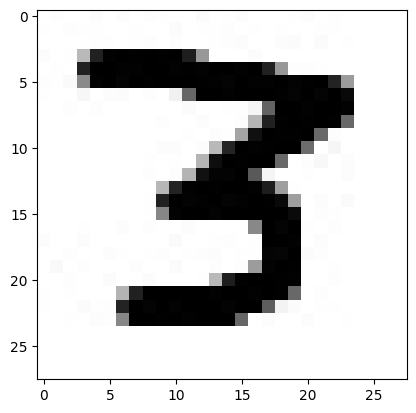

In [5]:
import matplotlib.pyplot as plt
plt.imshow(A)

In [6]:
#Data Collection
from keras.datasets import mnist


2024-06-03 19:06:21.632475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 19:06:21.632668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 19:06:21.825454: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
#X train has an image as a matrix and y_train has a number
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train[25]

2

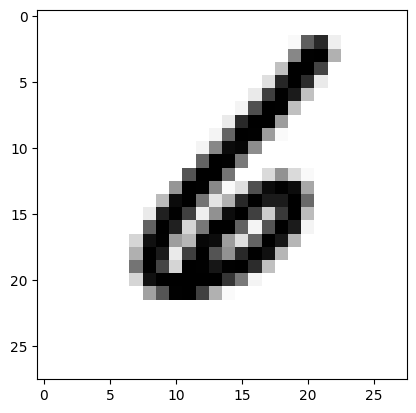

In [10]:
#Image Visualisation
plt.imshow(x_train[999],plt.get_cmap('binary'))

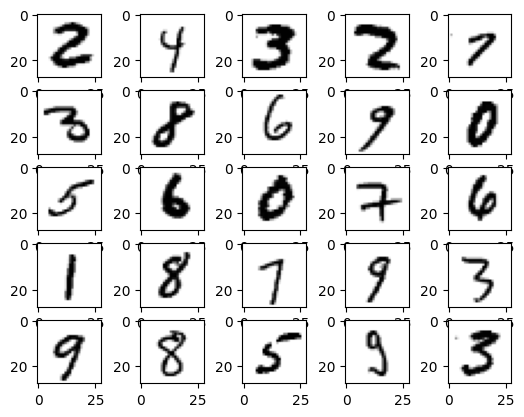

In [11]:
x=1
for i in range(25,50):
    plt.subplot(5,5,x)
    plt.imshow(x_train[i],plt.get_cmap('binary'))
    x+=1

In [12]:
#Start Processing

In [13]:
#Scaling
x_train=x_train/255
x_test=x_test/255

In [14]:
#Encoding
from keras.utils import to_categorical
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [15]:
#Build Model
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Convolution2D,MaxPooling2D,Flatten

In [16]:
nn=Sequential()

In [17]:
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Flatten())

nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000))

nn.add(Dense(10,activation='softmax'))

In [18]:
#Compile
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
#Add Callbacks
from keras.callbacks import EarlyStopping
Early=EarlyStopping(monitor='val_loss',patience=5)

In [20]:
#Fit the model
hist=nn.fit(x_train,y_train1,validation_split=0.2,callbacks=[Early],epochs=5)

Epoch 1/5
1500/1500 [==============================] - 46s 29ms/step - loss: 0.6123 - accuracy: 0.8008 - val_loss: 0.1711 - val_accuracy: 0.9524
Epoch 2/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3440 - accuracy: 0.8931 - val_loss: 0.1218 - val_accuracy: 0.9639
Epoch 3/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2952 - accuracy: 0.9087 - val_loss: 0.1186 - val_accuracy: 0.9637
Epoch 4/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2679 - accuracy: 0.9181 - val_loss: 0.0995 - val_accuracy: 0.9709
Epoch 5/5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2450 - accuracy: 0.9240 - val_loss: 0.0911 - val_accuracy: 0.9722


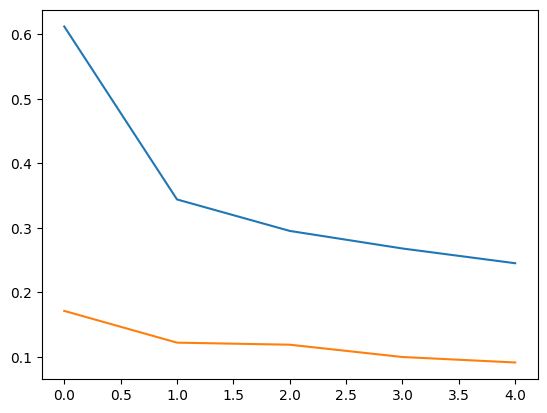

In [21]:
#Visulaise the result
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [22]:
# Evaluation Of Training data
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
import numpy as np

In [23]:
y_pred_train=nn.predict(x_train)
y_pred_train[0]

1875/1875 [==============================] - 13s 7ms/step


array([2.7106649e-03, 6.6354603e-04, 2.7552834e-03, 3.1436250e-02,
       3.3508652e-04, 8.8336056e-01, 2.3969775e-03, 4.9489032e-04,
       7.1037136e-02, 4.8096734e-03], dtype=float32)

In [24]:
y_pred_train1=np.argmax(y_pred_train,axis=-1)
y_pred_train1

array([5, 0, 4, ..., 5, 6, 8])

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
acc=accuracy_score(y_pred_train1,y_train)
clf=classification_report(y_pred_train1,y_train)
cnf=multilabel_confusion_matrix(y_pred_train1,y_train)

print('Accuracy:',acc)
print('Confusion matrix:\n',cnf)
print('classification Report:\n',clf)

Accuracy: 0.9714333333333334
Confusion matrix:
 [[[53937    90]
  [  140  5833]]

 [[53168    87]
  [   90  6655]]

 [[53759   258]
  [  283  5700]]

 [[53761   231]
  [  108  5900]]

 [[53951   140]
  [  207  5702]]

 [[54533   261]
  [   46  5160]]

 [[53945    86]
  [  137  5832]]

 [[53513   252]
  [  222  6013]]

 [[53884   142]
  [  265  5709]]

 [[53835   167]
  [  216  5782]]]
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5973
           1       0.99      0.99      0.99      6745
           2       0.96      0.95      0.95      5983
           3       0.96      0.98      0.97      6008
           4       0.98      0.96      0.97      5909
           5       0.95      0.99      0.97      5206
           6       0.99      0.98      0.98      5969
           7       0.96      0.96      0.96      6235
           8       0.98      0.96      0.97      5974
           9       0.97      0.96      0.97    

In [27]:
#Testing Data Analysis

In [28]:
ts_pred=nn.predict(x_test)
ts_pred

313/313 [==============================] - 2s 7ms/step


array([[1.7591273e-07, 1.0482603e-05, 7.4627837e-06, ..., 9.9997145e-01,
        1.4525573e-07, 4.2397232e-06],
       [2.1422456e-06, 3.1521828e-05, 9.9987954e-01, ..., 3.3011129e-05,
        1.1373975e-06, 1.2579059e-07],
       [7.8367606e-09, 9.9999982e-01, 1.7185445e-10, ..., 8.7405203e-09,
        3.7942115e-08, 7.1408257e-10],
       ...,
       [2.3266920e-09, 3.0792243e-08, 1.5259264e-08, ..., 1.2885882e-07,
        1.6718532e-07, 5.6602959e-05],
       [8.7459600e-03, 9.4851654e-04, 1.0834717e-04, ..., 3.1534242e-04,
        1.3313314e-02, 4.0314486e-04],
       [8.1164213e-03, 6.7488007e-05, 3.9005477e-04, ..., 1.7067895e-06,
        3.6343100e-04, 1.5851381e-05]], dtype=float32)

In [29]:
y_pred=np.argmax(ts_pred,axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
#Testing Accuracy
acc1=accuracy_score(y_pred,y_test)
clf1=classification_report(y_pred,y_test)
cnf1=multilabel_confusion_matrix(y_pred,y_test)

print('Accuracy:',acc1)
print('Confusion matrix:\n',cnf1)
print('classification Report:\n',clf1)

Accuracy: 0.9732
Confusion matrix:
 [[[8996   18]
  [  24  962]]

 [[8845    6]
  [  20 1129]]

 [[8923   45]
  [  45  987]]

 [[8971   22]
  [  19  988]]

 [[8989   25]
  [  29  957]]

 [[9099   34]
  [   9  858]]

 [[9023   27]
  [  19  931]]

 [[8932   43]
  [  40  985]]

 [[8996   17]
  [  30  957]]

 [[8958   31]
  [  33  978]]]
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       986
           1       0.99      0.98      0.99      1149
           2       0.96      0.96      0.96      1032
           3       0.98      0.98      0.98      1007
           4       0.97      0.97      0.97       986
           5       0.96      0.99      0.98       867
           6       0.97      0.98      0.98       950
           7       0.96      0.96      0.96      1025
           8       0.98      0.97      0.98       987
           9       0.97      0.97      0.97      1011

    accuracy                           0.97 

In [32]:
#Unseen Data Prediction

In [33]:
img=cv2.imread('/kaggle/input/image-samples/Example_3.jpg',cv2.IMREAD_GRAYSCALE)

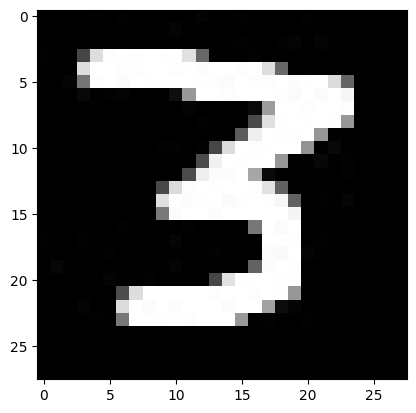

In [34]:
plt.imshow(img,plt.get_cmap('binary'))

In [35]:
img1=~img

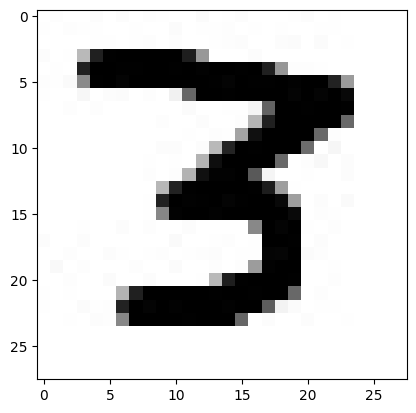

In [36]:
plt.imshow(img1,plt.get_cmap('binary'))

In [37]:
img1=img1/255


In [38]:
ar1=np.array([img1])
ar1

array([[[0.        , 0.00784314, 0.        , 0.        , 0.01176471,
         0.        , 0.01176471, 0.        , 0.00784314, 0.00392157,
         0.        , 0.        , 0.01568627, 0.        , 0.00392157,
         0.01176471, 0.        , 0.        , 0.        , 0.00392157,
         0.01176471, 0.        , 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00392157, 0.        , 0.00784314, 0.00392157, 0.00392157,
         0.        , 0.        , 0.00392157, 0.        , 0.        ,
         0.01568627, 0.        , 0.00392157, 0.00392157, 0.00784314,
         0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
         0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00392157,
         0.00392157, 0.        , 0.00392157, 0.00784314, 0.        ,
         0.00784314, 0.        , 0.        , 0.00392157, 0.00784314,
         0.

In [39]:
x=nn.predict(ar1)

1/1 [==============================] - 0s 30ms/step


In [40]:
np.argmax(x)

3